In [85]:
# Author : Gaurab Dutta
# Email : gaurabdutta8@gmail.com
# Capstone Project on HR Employee Attrition Data

## Importing Libraries

In [2]:
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, recall_score, precision_score
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Importing DataSet

In [3]:
data = pd.read_csv('HR_Employee_Attrition_Data.csv')
data

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
2935   36        No  Travel_Frequently        884  Research & Development   
2936   39        No      Travel_Rarely        613  Research & Development   
2937   27        No      Travel_Rarely        155  Research & Development   
2938   49        No  Travel_Frequently       1023                   Sales   
2939   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
2935                23          2        Medical              1   
2936                 6          1        Medical              1   
2937                 4          3  Life Sciences              1   
2938                 2          3        Medical              1   
2939                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  3  ...                         2            80   
3                  4  ...                         3            80   
4                  5  ...                         4            80   
...              ...  ...                       ...           ...   
2935            2936  ...                         3            80   
2936            2937  ...                         1            80   
2937            2938  ...                         2            80   
2938            2939  ...                         4            80   
2939            2940  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
2935                 1                 17                      3   
2936                 1                  9                      5   
2937                 1                  6                      0   
2938                 0                 17                      3   
2939                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
2935               3               5                  2   
2936               3               7                  7   
2937               3               6                  2   
2938               2               9    

## Understanding the Data

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

In [5]:
data.shape

(2940, 35)

In [6]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              2940
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [7]:
data.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  2940.000000  2940.000000       2940.000000  2940.000000         2940.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.133819   403.440447          8.105485     1.023991            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     2940.000000              2940.000000  2940.000000     2940.000000   
mean      1470.500000                 2.721769    65.891156        2.729932   
std        848.849221                 1.092896    20.325969        0.711440   
min          1.000000                 1.000000    30.000000        1.000000   
25%        735.750000                 2.000000    48.000000        2.000000   
50%       1470.500000                 3.000000    66.000000        3.000000   
75%       2205.250000                 4.000000    84.000000        3.000000   
max       2940.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  2940.000000  ...               2940.000000         2940.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106752  ...                  1.081025            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       2940.000000        2940.000000            2940.000000   
mean           0.793878          11.279592               2.799320   
std            0.851932           7.779458               1.289051   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      2940.000000     2940.000000         2940.000000   
mean          2.761224        7.008163            4.229252   
std           0.706356        6.125483            3.622521   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              2940.000000           2940.000000  
mean                  2.187755              4.123129  
std                   3.221882              3.567529  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [8]:
data['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [10]:
data['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [12]:
data.dtypes[data.dtypes == object]

Attrition         object
BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
Over18            object
OverTime          object
dtype: object

## Cleaning the Data

In [13]:
data.isnull()

Age  Attrition  BusinessTravel  DailyRate  Department  \
0     False      False           False      False       False   
1     False      False           False      False       False   
2     False      False           False      False       False   
3     False      False           False      False       False   
4     False      False           False      False       False   
...     ...        ...             ...        ...         ...   
2935  False      False           False      False       False   
2936  False      False           False      False       False   
2937  False      False           False      False       False   
2938  False      False           False      False       False   
2939  False      False           False      False       False   

      DistanceFromHome  Education  EducationField  EmployeeCount  \
0                False      False           False          False   
1                False      False           False          False   
2                False      False           False          False   
3                False      False           False          False   
4                False      False           False          False   
...                ...        ...             ...            ...   
2935             False      False           False          False   
2936             False      False           False          False   
2937             False      False           False          False   
2938             False      False           False          False   
2939             False      False           False          False   

      EmployeeNumber  ...  RelationshipSatisfaction  StandardHours  \
0              False  ...                     False          False   
1              False  ...                     False          False   
2              False  ...                     False          False   
3              False  ...                     False          False   
4              False  ...                     False          False   
...              ...  ...                       ...            ...   
2935           False  ...                     False          False   
2936           False  ...                     False          False   
2937           False  ...                     False          False   
2938           False  ...                     False          False   
2939           False  ...                     False          False   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                False              False                  False   
1                False              False                  False   
2                False              False                  False   
3                False              False                  False   
4                False              False                  False   
...                ...                ...                    ...   
2935             False              False                  False   
2936             False              False                  False   
2937             False              False                  False   
2938             False              False                  False   
2939             False              False                  False   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0               False           False               False   
1               False           False               False   
2               False           False               False   
3               False           False               False   
4               False           False               False   
...               ...             ...                 ...   
2935            False           False               False   
2936            False           False               False   
2937            False           False               False   
2938            False           False               False   
2939            False           False               False   

      YearsSinceLas

In [14]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
clean_data = data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)
clean_data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...                  3                         1                 0   
1    Male  ...                  4                         4                 1   
2    Male  ...                  3                         2                 0   
3  Female  ...                  3                         3                 0   
4    Male  ...                  3                         4                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   4                        0                    5  
1                   7                        1                    7  
2                   0                        0                    0  
3                   7                        3                    0  
4                   2                        2                    2  

[5 rows x 31 columns]

In [24]:
clean_data[clean_data.duplicated()].shape

(1470, 31)

In [16]:
clean_data.shape

(2940, 31)

In [17]:
clean_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

## Data Preprocessing

In [11]:
temp = clean_data.columns.values
temp

array(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], dtype=object)

In [32]:
for i in temp:
    if (clean_data[i].dtypes == 'object') & (clean_data[i].nunique() == 2):
        print('LabelEncoder:', i)
    elif (clean_data[i].dtypes == 'object') & (clean_data[i].nunique() > 2):
        print('OneHotEncoder:', i)

LabelEncoder: Attrition
OneHotEncoder: BusinessTravel
OneHotEncoder: Department
OneHotEncoder: EducationField
LabelEncoder: Gender
OneHotEncoder: JobRole
OneHotEncoder: MaritalStatus
LabelEncoder: OverTime


In [26]:
le = LabelEncoder()
df = clean_data.copy()
df['Attrition'] = le.fit_transform(df['Attrition'])
df['OverTime'] = le.fit_transform(df['OverTime'])
df['Gender'] = le.fit_transform(df['Gender'])

In [44]:
df.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0       0  ...                  3                         1                 0   
1       1  ...                  4                         4                 1   
2       1  ...                  3                         2                 0   
3       0  ...                  3                         3                 0   
4       1  ...                  3                         4                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 31 columns]

## Exploratory Data Analysis

No     2466
Yes     474
Name: Attrition, dtype: int64


<AxesSubplot:xlabel='Attrition', ylabel='count'>

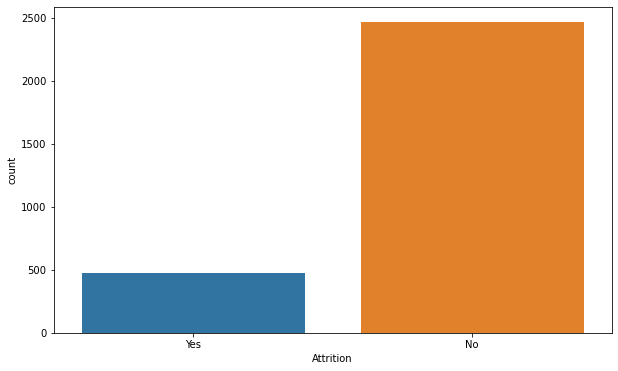

In [37]:
print(clean_data.Attrition.value_counts())

plt.figure(figsize=(10,6))
sns.countplot(x="Attrition", data=clean_data)

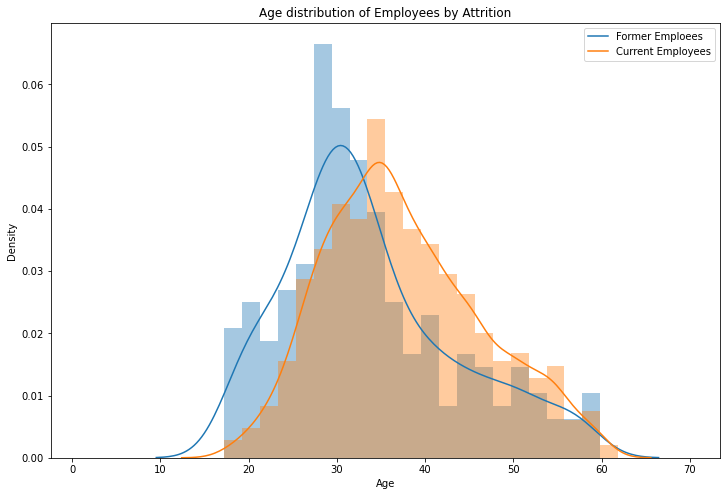

In [32]:
# Plot the distribution of age by Attrition Factor
plt.figure(figsize=(12,8))
plt.title('Age distribution of Employees by Attrition')
sns.distplot(clean_data.Age[clean_data.Attrition == 'Yes'], bins = np.linspace(1,70,35))
sns.distplot(clean_data.Age[clean_data.Attrition == 'No'], bins = np.linspace(1,70,35))
plt.legend(['Former Emploees','Current Employees'])

Looks like most people leave the company in their early 30's

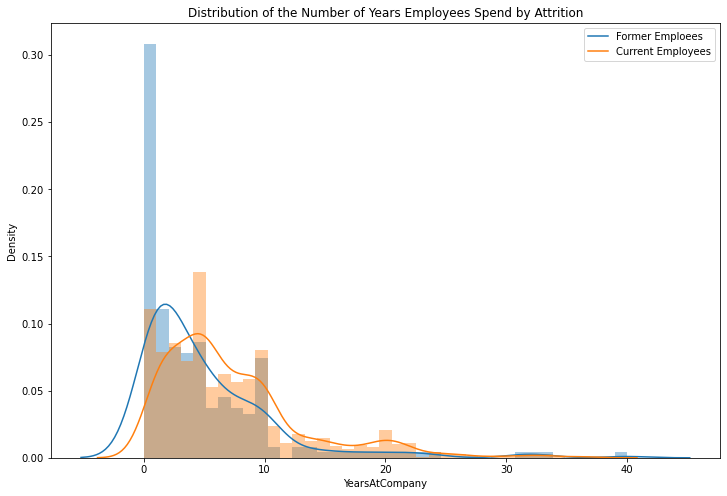

In [33]:
# Plot the distribution of Years at Company by Attrition
plt.figure(figsize=(12,8))
plt.title('Distribution of the Number of Years Employees Spend by Attrition')
sns.distplot(clean_data.YearsAtCompany[clean_data.Attrition == 'Yes'], bins = np.linspace(0,40,40))
sns.distplot(clean_data.YearsAtCompany[clean_data.Attrition == 'No'], bins = np.linspace(0,40,40))
plt.legend(['Former Emploees','Current Employees'])

Two takeaways:

1. The highest attrition rate occurs in the first year of the job. Over 20% of all employees who left did so in their first year.
2. The vast majority of the workforce has been at the company for under 10 years. Perhaps only the best and brightest get the privledge to continue on after 10 years.

Text(0.5, 0.98, 'Attrition Counts by whether an Employee worked Over Time')

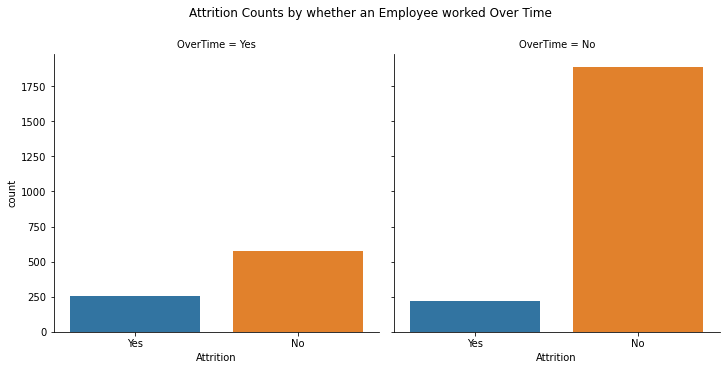

In [38]:
# Plot out the counts of OverTime
sns.factorplot("Attrition", col="OverTime", data=clean_data, kind="count", col_wrap=2, size=5)
plt.subplots_adjust(top=.85)
plt.suptitle('Attrition Counts by whether an Employee worked Over Time')

From this plot I can see the employees who don't work over time are less likely to leave the company than those who do.

<AxesSubplot:title={'center':'Age Distribution of Employees who have worked Over Time'}, xlabel='Age', ylabel='Density'>

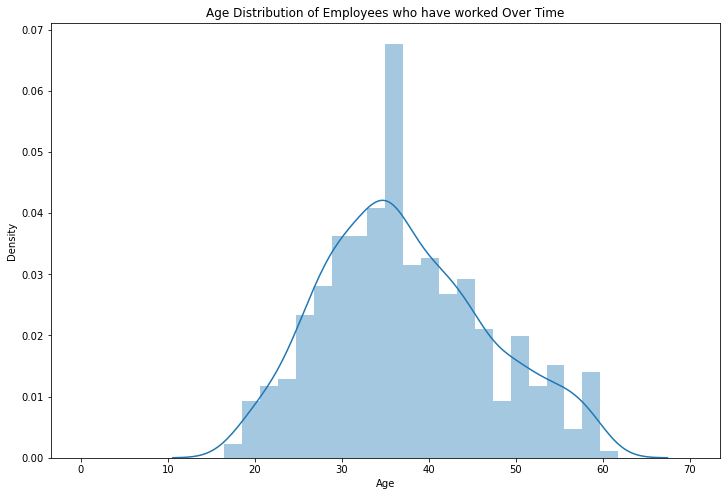

In [39]:
# Plot the distribution of Years at Company by Attrition
plt.figure(figsize=(12,8))
plt.title('Age Distribution of Employees who have worked Over Time')
sns.distplot(clean_data.Age[clean_data.OverTime == 'Yes'], bins = np.linspace(0,70,35))

It appears to be distributed equally throughout all ages. The company doesn't discriminate on who works overtime.

60.0

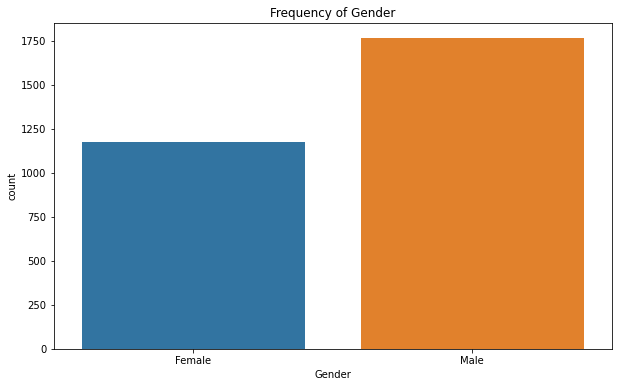

In [43]:
# Gender distribution in the company
plt.figure(figsize=(10,6))
sns.countplot(x="Gender", data=clean_data)
plt.title('Frequency of Gender')
clean_data['Gender'].value_counts().Male/clean_data['Gender'].count()*100

There is some gender imbalance as there are 60% male and 40% female in the company.

   Gender Attrition  percentage
0  Female        No   85.204082
2    Male        No   82.993197
1  Female       Yes   14.795918
3    Male       Yes   17.006803


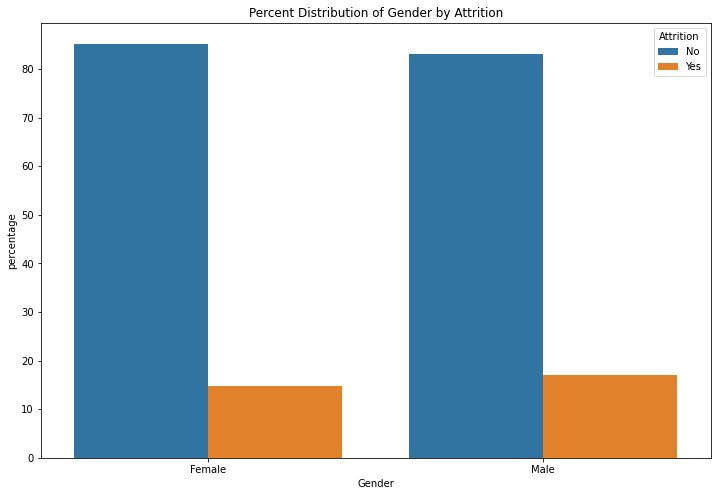

In [48]:
# Plot the Percent Distribution of Gender by Attrition in the company
attrition_counts = (clean_data.groupby(['Gender'])['Attrition']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Attrition'))
plt.figure(figsize=(12,8))
plt.title('Percent Distribution of Gender by Attrition')
sns.barplot(x="Gender", y="percentage", hue="Attrition", data=attrition_counts)
print(attrition_counts)

The proportion of attrition rates is almost exactly the same for men and women.

<AxesSubplot:title={'center':'Percent Distribution of Gender by Business Travel Frequency'}, xlabel='Gender', ylabel='percentage'>

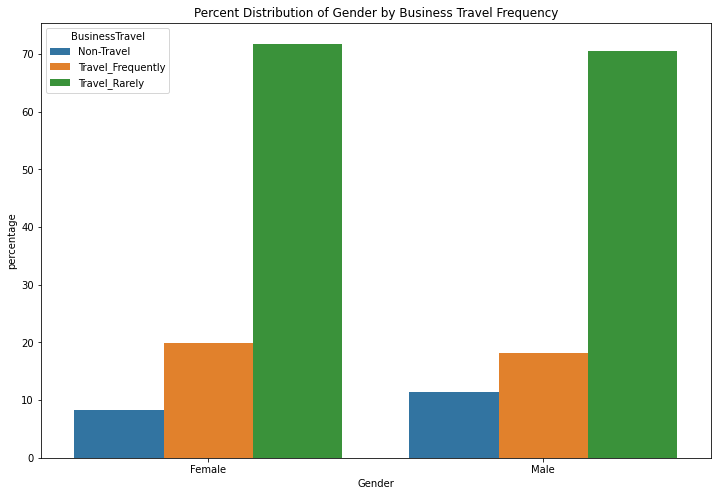

In [49]:
# Plot the Percent Distribution of Gender by Business Travel Frequency
attrition_counts = (clean_data.groupby(['Gender'])['BusinessTravel']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('BusinessTravel'))
plt.figure(figsize=(12,8))
plt.title('Percent Distribution of Gender by Business Travel Frequency')
sns.barplot(x="Gender", y="percentage", hue="BusinessTravel", data=attrition_counts) 

Here also the frequency of travel is almost same for both genders.

<AxesSubplot:title={'center':'Distribution of Gender across Departments'}, xlabel='Gender', ylabel='percentage'>

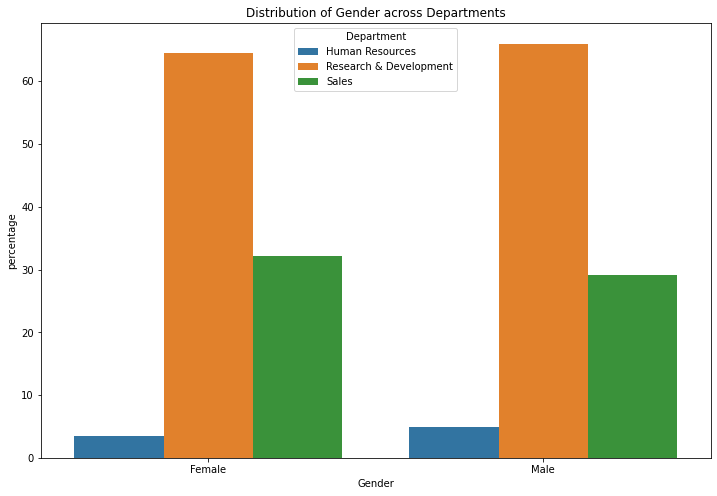

In [51]:
# Plot the Distribution of Gender across Departments
attrition_counts = (clean_data.groupby(['Gender'])['Department']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Department'))
plt.figure(figsize=(12,8))
plt.title('Distribution of Gender across Departments')
sns.barplot(x="Gender", y="percentage", hue="Department", data=attrition_counts) 

The company dosen't discriminate much on gender for assigning departments.

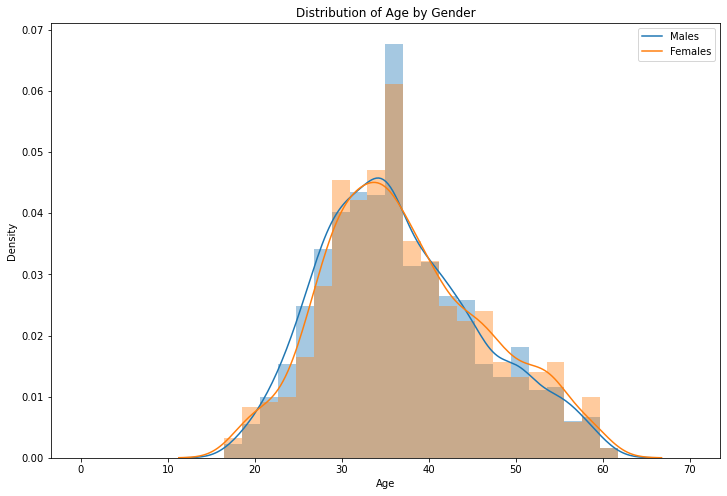

In [52]:
# Plot the distribution of age by gender
plt.figure(figsize=(12,8))
sns.distplot(clean_data.Age[clean_data.Gender == 'Male'], bins = np.linspace(0,70,35))
sns.distplot(clean_data.Age[clean_data.Gender == 'Female'], bins = np.linspace(0,70,35))
plt.title('Distribution of Age by Gender')
plt.legend(['Males','Females'])

The distribution of ages at this company is mostly equal, but 32-38 year old middle-aged males outnumber the rest of the age brackets.

<AxesSubplot:title={'center':'Average Monthly Income by Gender'}, xlabel='Gender', ylabel='MonthlyIncome'>

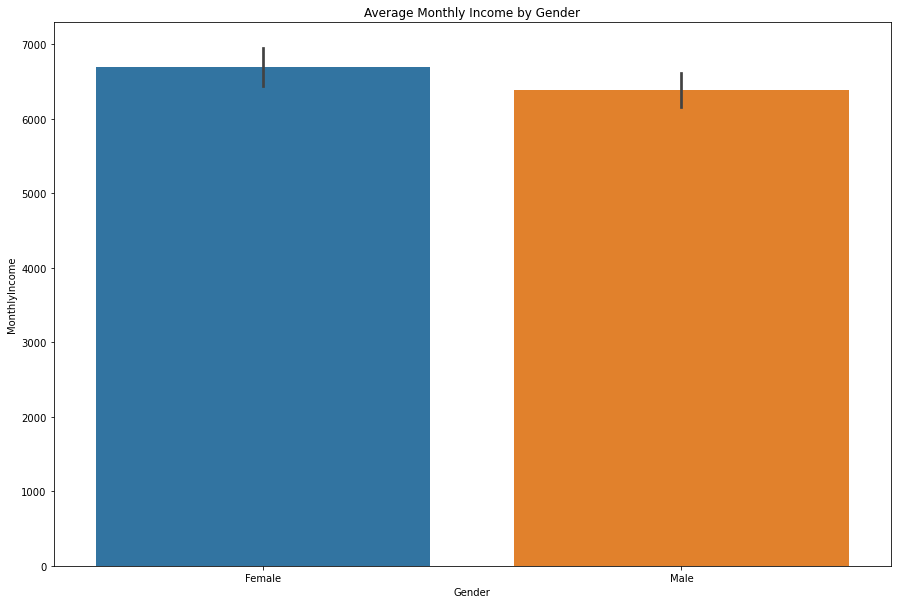

In [54]:
# Plot of Average Monthly Income by Gender
plt.figure(figsize=(15,10))
plt.title('Average Monthly Income by Gender')
sns.barplot(x="Gender", y="MonthlyIncome", data=clean_data)

Females have a slightly higher monthly income than males.

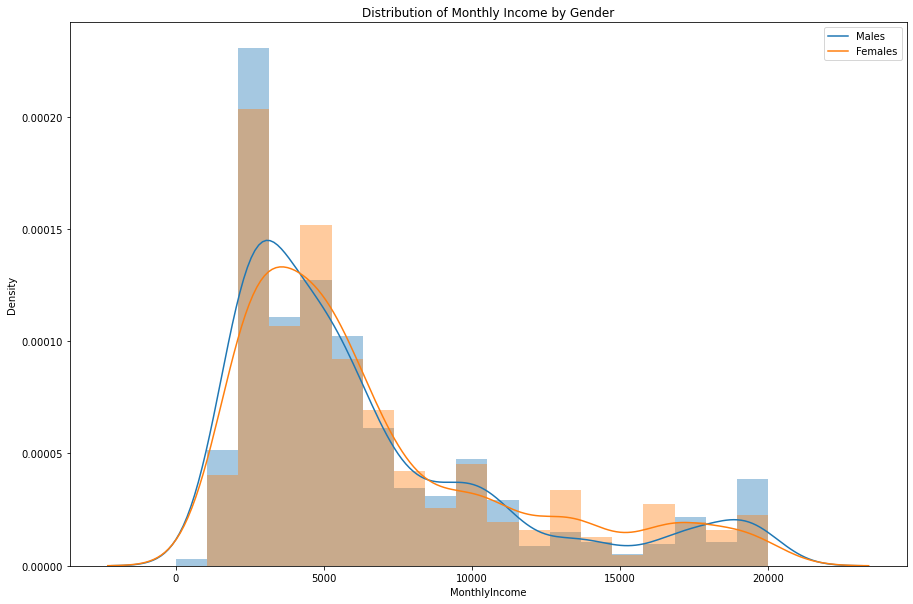

In [55]:
# Plot the Distribution of Monthly Income by Gender
plt.figure(figsize=(15,10))
plt.title('Distribution of Monthly Income by Gender')
sns.distplot(clean_data.MonthlyIncome[clean_data.Gender == 'Male'], bins = np.linspace(0,20000,20))
sns.distplot(clean_data.MonthlyIncome[clean_data.Gender == 'Female'], bins = np.linspace(0,20000,20))
plt.legend(['Males','Females'])

The most common monthly wage comes in the 2-3K mark. There are noticeably more males in this wage bracket than females.

<AxesSubplot:title={'center':'Average Monthly Income by Gender and Maritial Status'}, xlabel='MaritalStatus', ylabel='MonthlyIncome'>

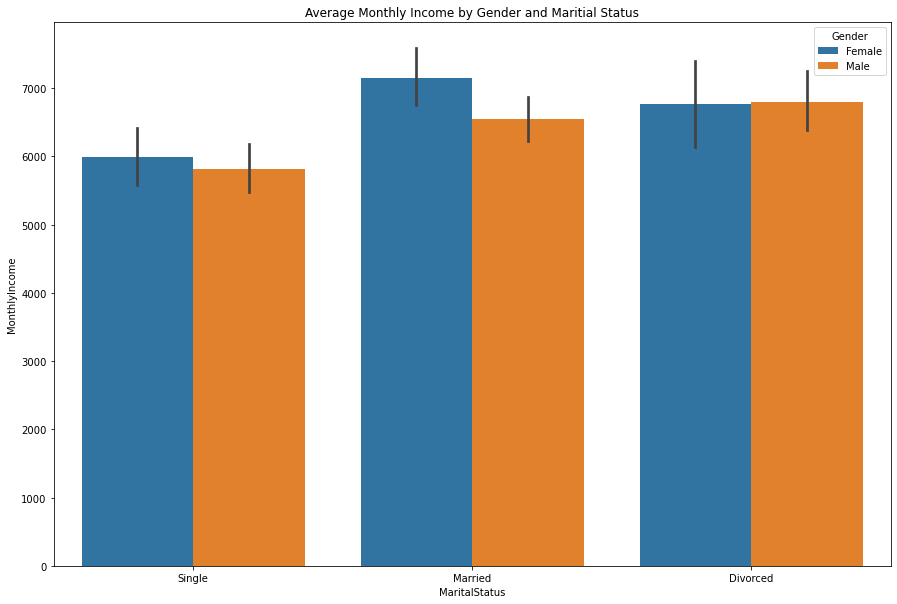

In [57]:
# Plot of Average Monthly Income by Gender and Maritial Status
plt.figure(figsize=(15,10))
plt.title('Average Monthly Income by Gender and Maritial Status')
sns.barplot(x="MaritalStatus", y="MonthlyIncome", hue="Gender", data=clean_data)

It appears that while there are less females in the workplace, they earn more than the males, but leave at the same rates. Married people have clear advantage over single people but it might be correlated simply to age.

<AxesSubplot:title={'center':'Average Monthly Income by Gender and Maritial Status'}, xlabel='MaritalStatus', ylabel='Age'>

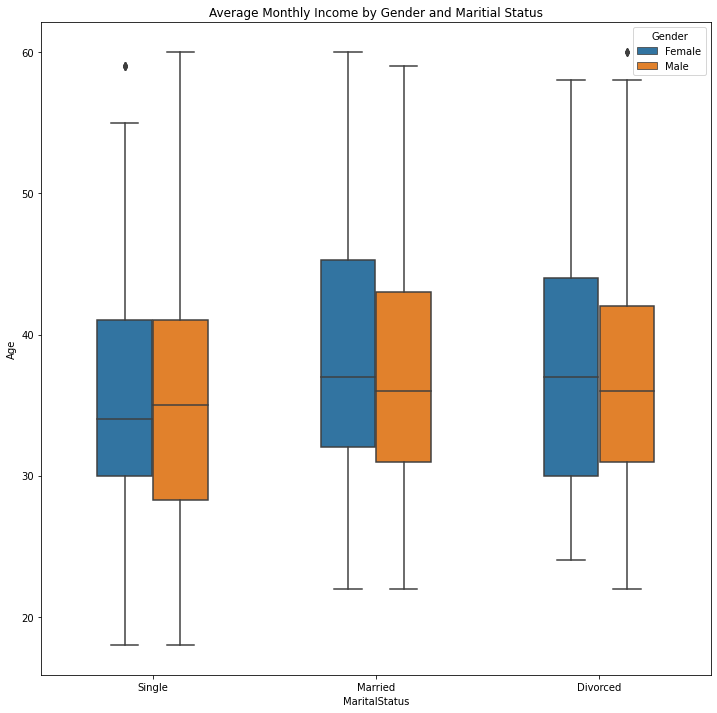

In [59]:
# Age by Gender and Martial Status 
plt.figure(figsize=(12,12))
plt.title('Average Monthly Income by Gender and Maritial Status')
sns.boxplot(x="MaritalStatus", y="Age", hue="Gender", data=clean_data, width=.5) 

There's no real difference in the distribution of age over these categories.

Text(0.5, 1.0, 'Frequency of JobSatisfaction')

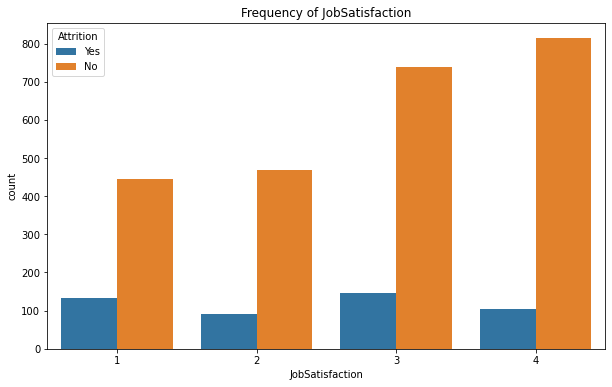

In [84]:
# JobSatisfaction distribution in the company
plt.figure(figsize=(10,6))
sns.countplot(x="JobSatisfaction", hue='Attrition', data=clean_data)
plt.title('Frequency of JobSatisfaction')

Seems like more people in the company are statisfied with their jobs as compared the unsatisfied employees but the attrition rate remains pretty much same for all the categories.

<Figure size 864x576 with 0 Axes>

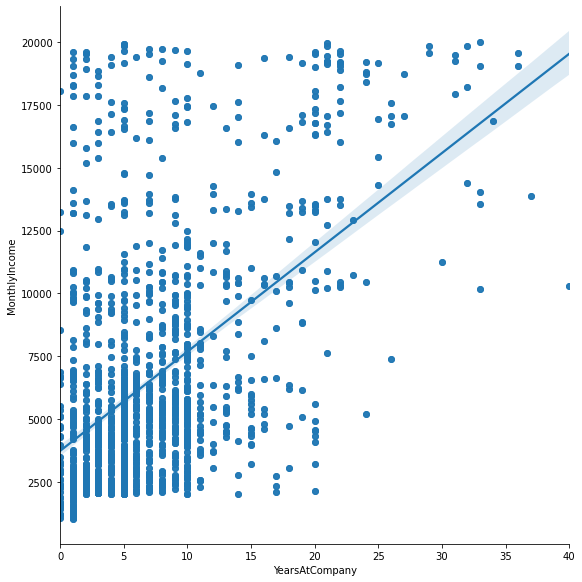

In [63]:
plt.figure(figsize=(12,8))
sns.lmplot("YearsAtCompany", "MonthlyIncome", data=clean_data, size=8) 

We can see that there's plenty of employees earning over 10K a month regardless of how long they've been at the company. But after the 10 year mark there's an attrition of lower paid employees raising the average through the age brackets.

## Relationship Analysis

<AxesSubplot:>

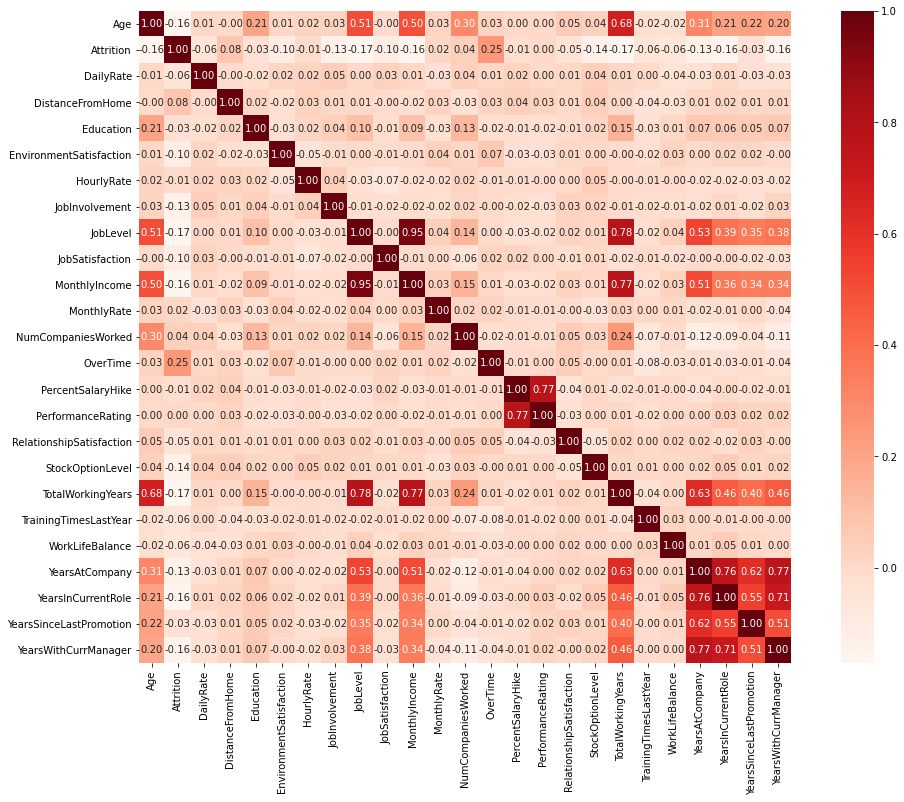

In [57]:
# Correlation heatmap
cormat = df.corr()
plt.figure(figsize=(18,12))
sns.heatmap(cormat, xticklabels=cormat.columns, yticklabels=cormat.columns, square=True, annot=True, fmt='0.2f', cmap='Reds')

<AxesSubplot:xlabel='OverTime', ylabel='count'>

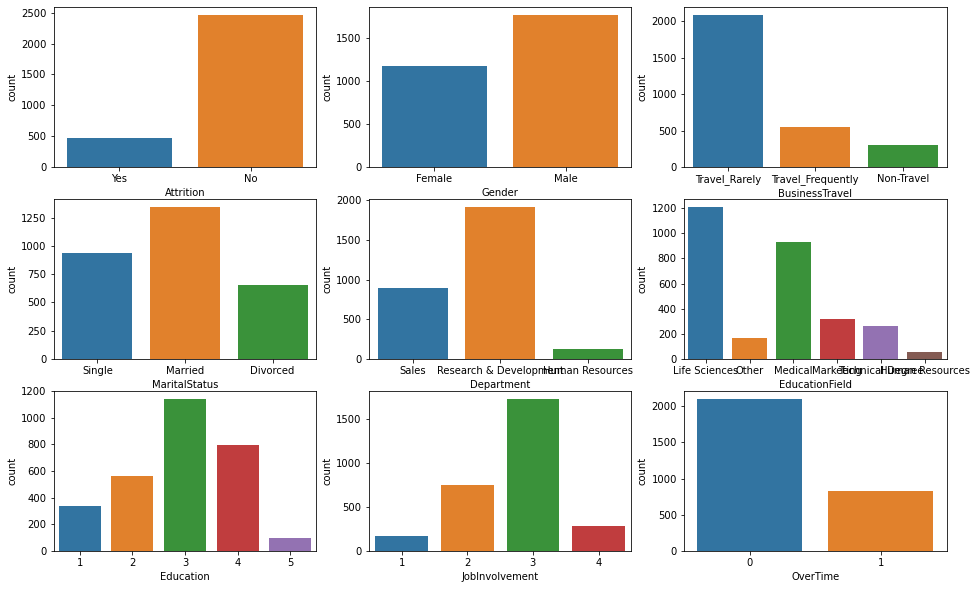

In [133]:
# Countplot - gives the count of few categorical variables
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(16,10))
sns.countplot(x='Attrition', data=clean_data, ax=axes[0,0])
sns.countplot(x='Gender', data=df, ax=axes[0,1])
sns.countplot(x='BusinessTravel', data=df, ax=axes[0,2])
sns.countplot(x='MaritalStatus', data=clean_data, ax=axes[1,0])
sns.countplot(x='Department', data=df, ax=axes[1,1])
sns.countplot(x='EducationField', data=df, ax=axes[1,2])
sns.countplot(x='Education', data=clean_data, ax=axes[2,0])
sns.countplot(x='JobInvolvement', data=df, ax=axes[2,1])
sns.countplot(x='OverTime', data=df, ax=axes[2,2])

<AxesSubplot:xlabel='OverTime', ylabel='count'>

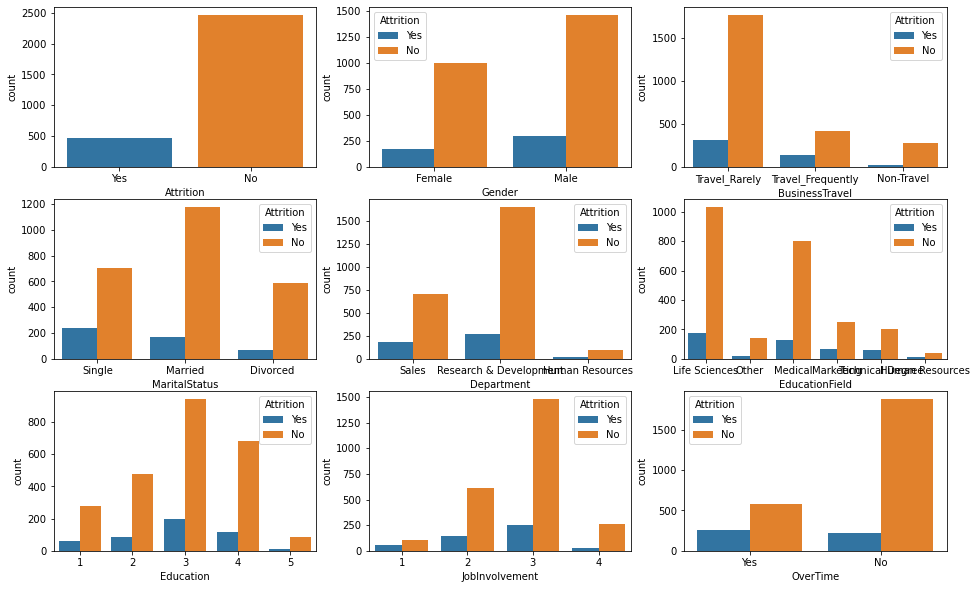

In [134]:
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(16,10))
sns.countplot(x='Attrition', data=clean_data, ax=axes[0,0])
sns.countplot(x='Gender', hue='Attrition', data=clean_data, ax=axes[0,1])
sns.countplot(x='BusinessTravel', hue='Attrition', data=clean_data, ax=axes[0,2])
sns.countplot(x='MaritalStatus', hue='Attrition', data=clean_data, ax=axes[1,0])
sns.countplot(x='Department', hue='Attrition', data=clean_data, ax=axes[1,1])
sns.countplot(x='EducationField', hue='Attrition', data=clean_data, ax=axes[1,2])
sns.countplot(x='Education', hue='Attrition', data=clean_data, ax=axes[2,0])
sns.countplot(x='JobInvolvement', hue='Attrition', data=clean_data, ax=axes[2,1])
sns.countplot(x='OverTime', hue='Attrition', data=clean_data, ax=axes[2,2])

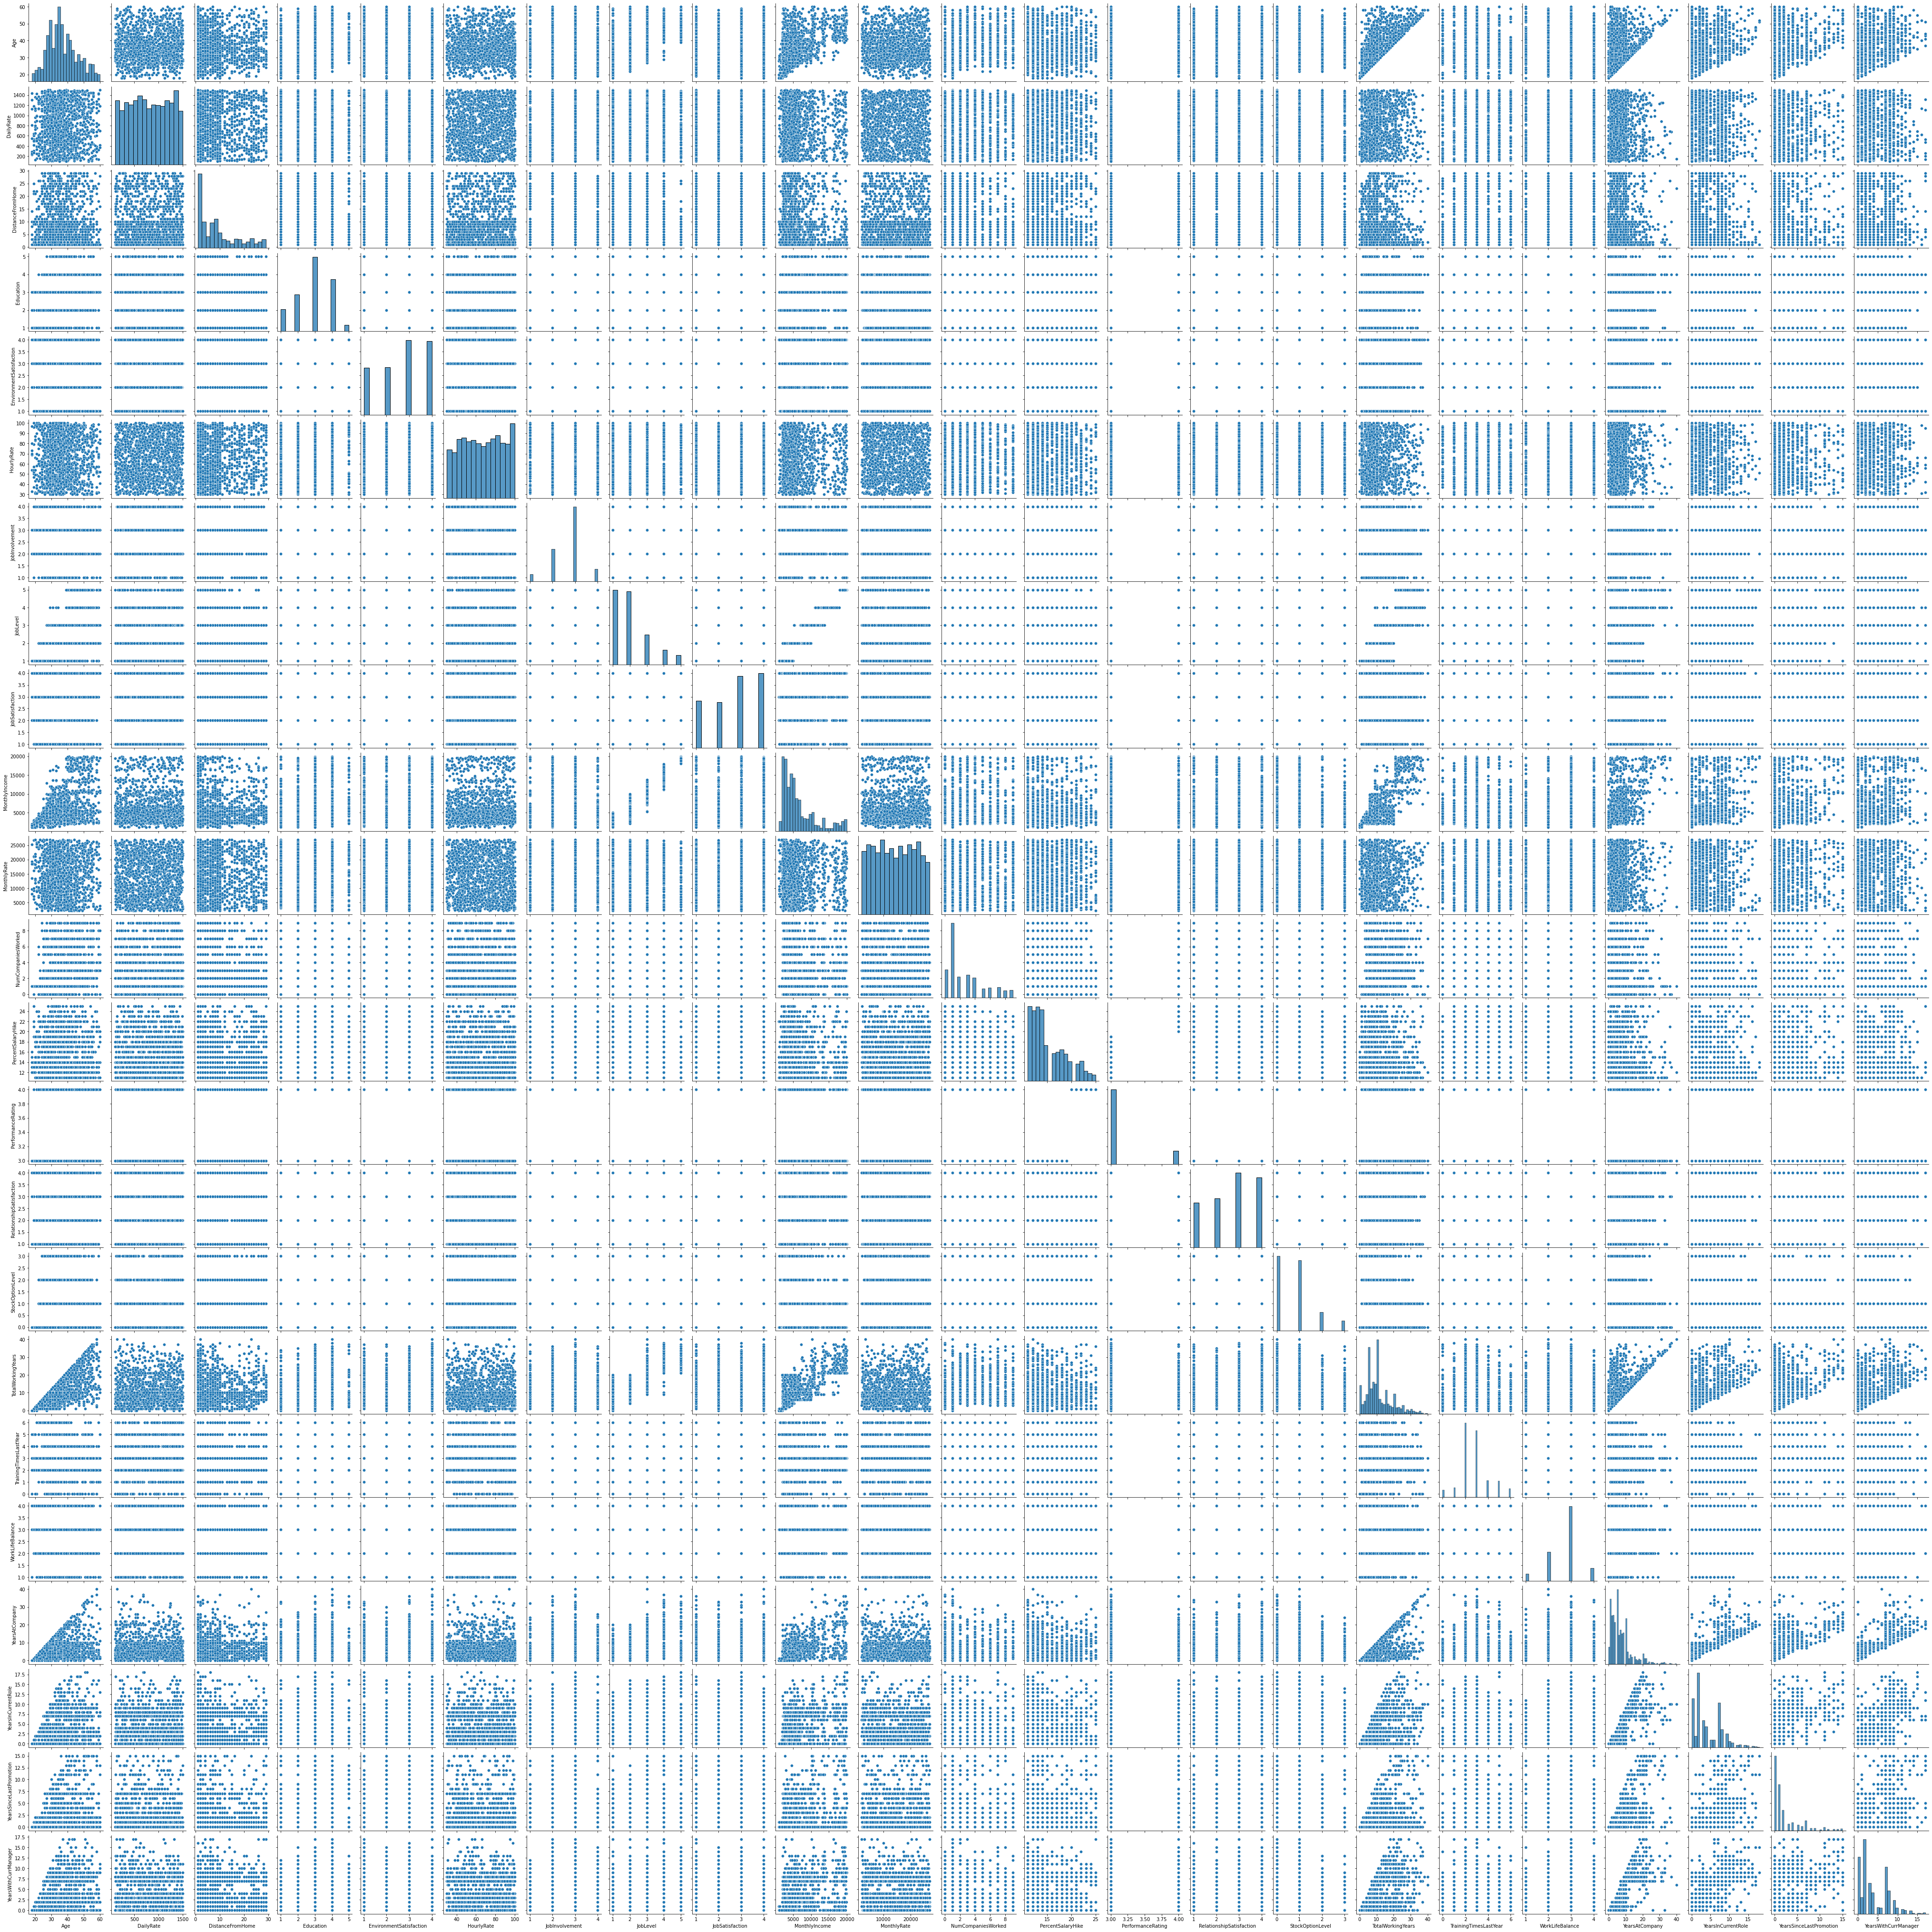

In [96]:
sns.pairplot(clean_data)

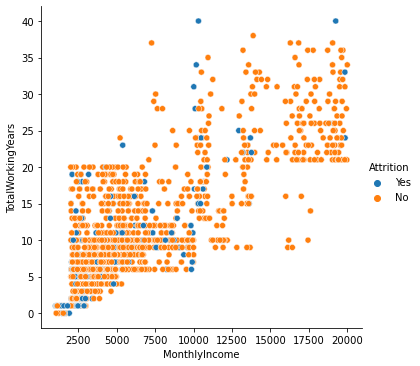

In [98]:
# Scatter plot - shows the relationship between two numerical variables
sns.relplot(x='MonthlyIncome', y='TotalWorkingYears', hue='Attrition', data=clean_data)

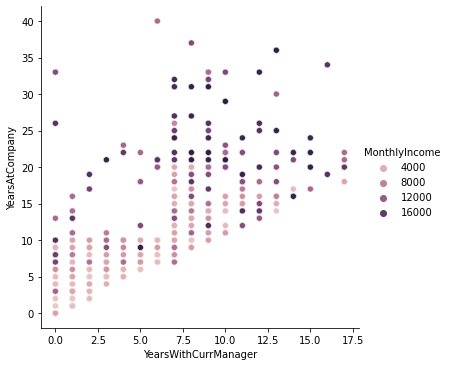

In [100]:
sns.relplot(x='YearsWithCurrManager', y='YearsAtCompany', hue='MonthlyIncome', data=clean_data)

<AxesSubplot:xlabel='MonthlyRate', ylabel='Density'>

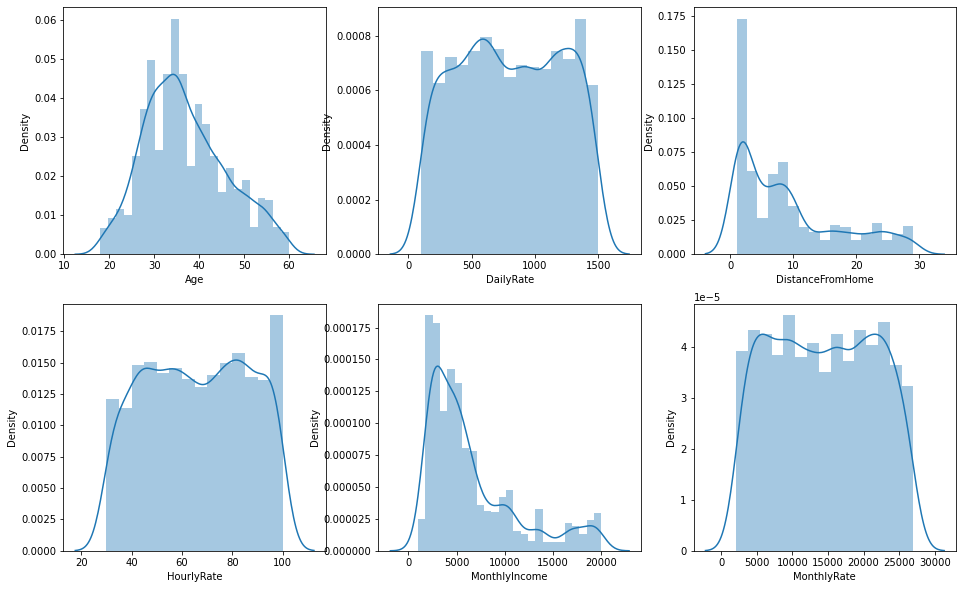

In [125]:
# histogram plot - shows the spread of a contineous data
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,10))
sns.distplot(clean_data['Age'],  ax=axes[0,0])
sns.distplot(clean_data['DailyRate'],  ax=axes[0,1])
sns.distplot(clean_data['DistanceFromHome'],  ax=axes[0,2])
sns.distplot(clean_data['HourlyRate'],  ax=axes[1,0])
sns.distplot(clean_data['MonthlyIncome'],  ax=axes[1,1])
sns.distplot(clean_data['MonthlyRate'],  ax=axes[1,2])

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='Density'>

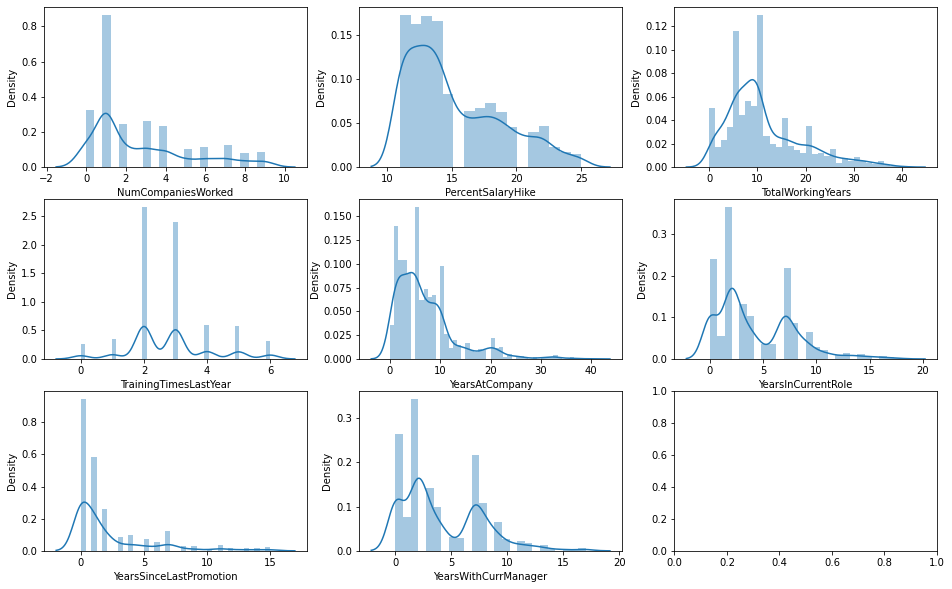

In [127]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16,10))
sns.distplot(clean_data['NumCompaniesWorked'],  ax=axes[0,0])
sns.distplot(clean_data['PercentSalaryHike'],  ax=axes[0,1])
sns.distplot(clean_data['TotalWorkingYears'],  ax=axes[0,2])
sns.distplot(clean_data['TrainingTimesLastYear'],  ax=axes[1,0])
sns.distplot(clean_data['YearsAtCompany'],  ax=axes[1,1])
sns.distplot(clean_data['YearsInCurrentRole'],  ax=axes[1,2])
sns.distplot(clean_data['YearsSinceLastPromotion'],  ax=axes[2,0])
sns.distplot(clean_data['YearsWithCurrManager'],  ax=axes[2,1])
# sns.distplot(clean_data[''],  ax=axes[2,2])

<AxesSubplot:xlabel='Attrition', ylabel='YearsWithCurrManager'>

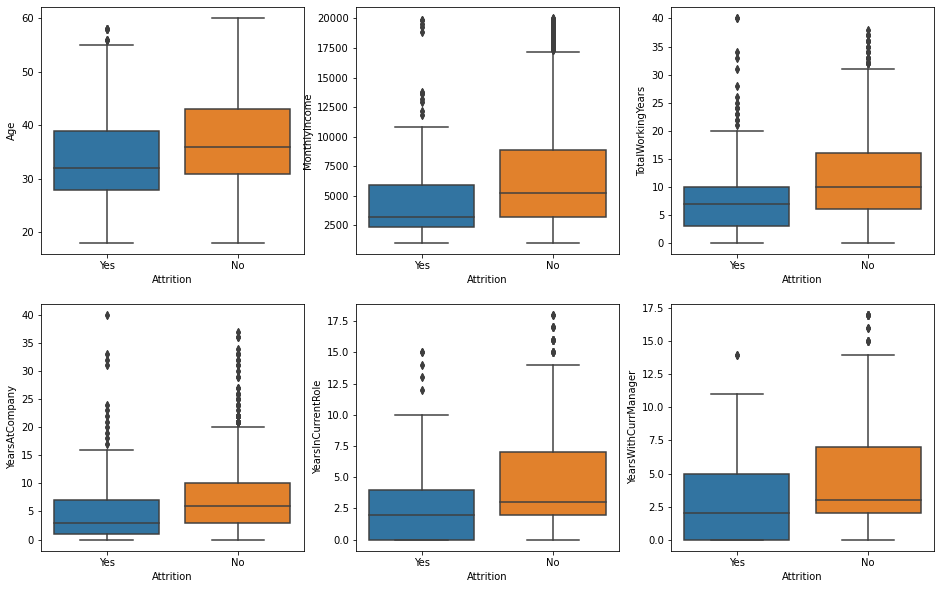

In [147]:
# boxplot
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,10))
sns.boxplot(y='Age', x='Attrition', data=clean_data, ax=axes[0,0])
sns.boxplot(y='MonthlyIncome', x='Attrition', data=clean_data, ax=axes[0,1])
sns.boxplot(y='TotalWorkingYears', x='Attrition', data=clean_data, ax=axes[0,2])
sns.boxplot(y='YearsAtCompany', x='Attrition', data=clean_data, ax=axes[1,0])
sns.boxplot(y='YearsInCurrentRole', x='Attrition', data=clean_data, ax=axes[1,1])
sns.boxplot(y='YearsWithCurrManager', x='Attrition', data=clean_data, ax=axes[1,2])

## Categorical variable encoding

In [ ]:
ohe = OneHotEncoder()
# df['BusinessTravel'] = ohe.fit_transform(df['BusinessTravel'])
# df['Department'] = ohe.fit_transform(df['Department'])
# df['EducationField'] = ohe.fit_transform(df['EducationField'])
# df['JobRole'] = ohe.fit_transform(df['JobRole'])
# df['MaritalStatus'] = ohe.fit_transform(df['MaritalStatus'])

In [13]:
BusinessTravel_dummies = pd.get_dummies(df.BusinessTravel, drop_first=True, prefix='BusinessTravel')
Department_dummies = pd.get_dummies(df.Department, drop_first=True, prefix='Department')
EducationField_dummies = pd.get_dummies(df.EducationField, drop_first=True, prefix='EducationField')
JobRole_dummies = pd.get_dummies(df.JobRole, drop_first=True, prefix='JobRole')
MaritalStatus_dummies = pd.get_dummies(df.MaritalStatus, drop_first=True, prefix='MaritalStatus')

In [14]:
df = pd.concat([df, 
           BusinessTravel_dummies, 
           Department_dummies, 
           EducationField_dummies, 
           JobRole_dummies, 
           MaritalStatus_dummies], 
          axis=1)

In [65]:
df = df.drop(columns = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus'], axis=1)

In [52]:
df.head()

Age  Attrition  DailyRate  DistanceFromHome  Education  \
0   41          1       1102                 1          2   
1   49          0        279                 8          1   
2   37          1       1373                 2          2   
3   33          0       1392                 3          4   
4   27          0        591                 2          1   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  ...  \
0                        2       0          94               3         2  ...   
1                        3       1          61               2         2  ...   
2                        4       1          92               2         1  ...   
3                        4       0          56               3         1  ...   
4                        1       1          40               3         1  ...   

   JobRole_Human Resources  JobRole_Laboratory Technician  JobRole_Manager  \
0                        0                              0                0   
1                        0                              0                0   
2                        0                              1                0   
3                        0                              0                0   
4                        0                              1                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   
2                           0                        0   
3                           1                        0   
4                           0                        0   

   JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  
0                             0                      0                     1  
1                             0                      1                     0  
2                             0                      0                     1  
3                             0                      1                     0  
4                             0                      1                     0  

[5 rows x 45 columns]

## Split the data into Train-Test

In [66]:
x = df.drop(['Attrition'],axis =1)
y = df['Attrition']

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [43]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2352, 44), (588, 44), (2352,), (588,))

## Feature Selection Using Variance Threshold

In [21]:
var_thres = VarianceThreshold(threshold=0.0)
var_thres.fit(x_train)

VarianceThreshold()

In [22]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [86]:
x_train.columns[var_thres.get_support() == False]

Index([], dtype='object')

## Feature Selection Using Pearson Correlation

In [90]:
x_train.corr()

Age  DailyRate  DistanceFromHome  \
Age                                1.000000   0.021002         -0.004838   
DailyRate                          0.021002   1.000000          0.003075   
DistanceFromHome                  -0.004838   0.003075          1.000000   
Education                          0.212828  -0.020082          0.022998   
EnvironmentSatisfaction            0.003702   0.025835         -0.028550   
Gender                            -0.036037  -0.006793         -0.003847   
HourlyRate                         0.018888   0.024263          0.043975   
JobInvolvement                     0.031311   0.047906         -0.009098   
JobLevel                           0.503778   0.016681          0.000900   
JobSatisfaction                    0.008464   0.009322          0.002944   
MonthlyIncome                      0.493570   0.020320         -0.015132   
MonthlyRate                        0.010964  -0.016731          0.032544   
NumCompaniesWorked                 0.291751   0.034485         -0.027494   
OverTime                           0.014083  -0.002084          0.025223   
PercentSalaryHike                  0.008327   0.028599          0.047373   
PerformanceRating                 -0.001373   0.005711          0.028455   
RelationshipSatisfaction           0.064196   0.019656          0.004978   
StockOptionLevel                   0.045029   0.043624          0.048693   
TotalWorkingYears                  0.677088   0.019661          0.003869   
TrainingTimesLastYear             -0.018295  -0.008359         -0.033468   
WorkLifeBalance                   -0.025590  -0.034032         -0.020957   
YearsAtCompany                     0.321992  -0.030883          0.010588   
YearsInCurrentRole                 0.219173   0.008519          0.014099   
YearsSinceLastPromotion            0.226973  -0.023334          0.012927   
YearsWithCurrManager               0.212548  -0.032031          0.016406   
BusinessTravel_Travel_Frequently  -0.039355  -0.010849          0.001717   
BusinessTravel_Travel_Rarely       0.045537   0.005072         -0.022768   
Department_Research & Development  0.022262   0.019972          0.002018   
Department_Sales                  -0.029775  -0.016003          0.005435   
EducationField_Life Sciences       0.026431  -0.015236         -0.025740   
EducationField_Marketing           0.025243  -0.067141          0.029377   
EducationField_Medical            -0.005494   0.048948          0.025214   
EducationField_Other              -0.046219   0.012477         -0.014988   
EducationField_Technical Degree   -0.025826   0.022491         -0.008394   
JobRole_Human Resources           -0.036481  -0.008063         -0.021449   
JobRole_Laboratory Technician     -0.143365  -0.021180          0.012546   
JobRole_Manager                    0.302002  -0.011025         -0.039704   
JobRole_Manufacturing Director     0.066530   0.002357          0.016406   
JobRole_Research Director          0.176689   0.006251         -0.017493   
JobRole_Research Scientist        -0.143916   0.000065         -0.004940   
JobRole_Sales Executive           -0.012960  -0.005317          0.022401   
JobRole_Sales Representative      -0.168990  -0.009014         -0.017728   
MaritalStatus_Married              0.091890   0.036446          0.044284   
MaritalStatus_Single              -0.121583  -0.072791         -0.033882   

                                   Education  EnvironmentSatisfaction  \
Age                                 0.212828                 0.003702   
DailyRate                          -0.020082                 0.025835   
DistanceFromHome                    0.022998                -0.028550   
Education                           1.000000                -0.033735   
EnvironmentSatisfaction            -0.033735                 1.000000   
Gender                             -0.032962                -0.000231   
HourlyRate                          0.018387                -0.052344   
JobInvolvement                     

<AxesSubplot:>

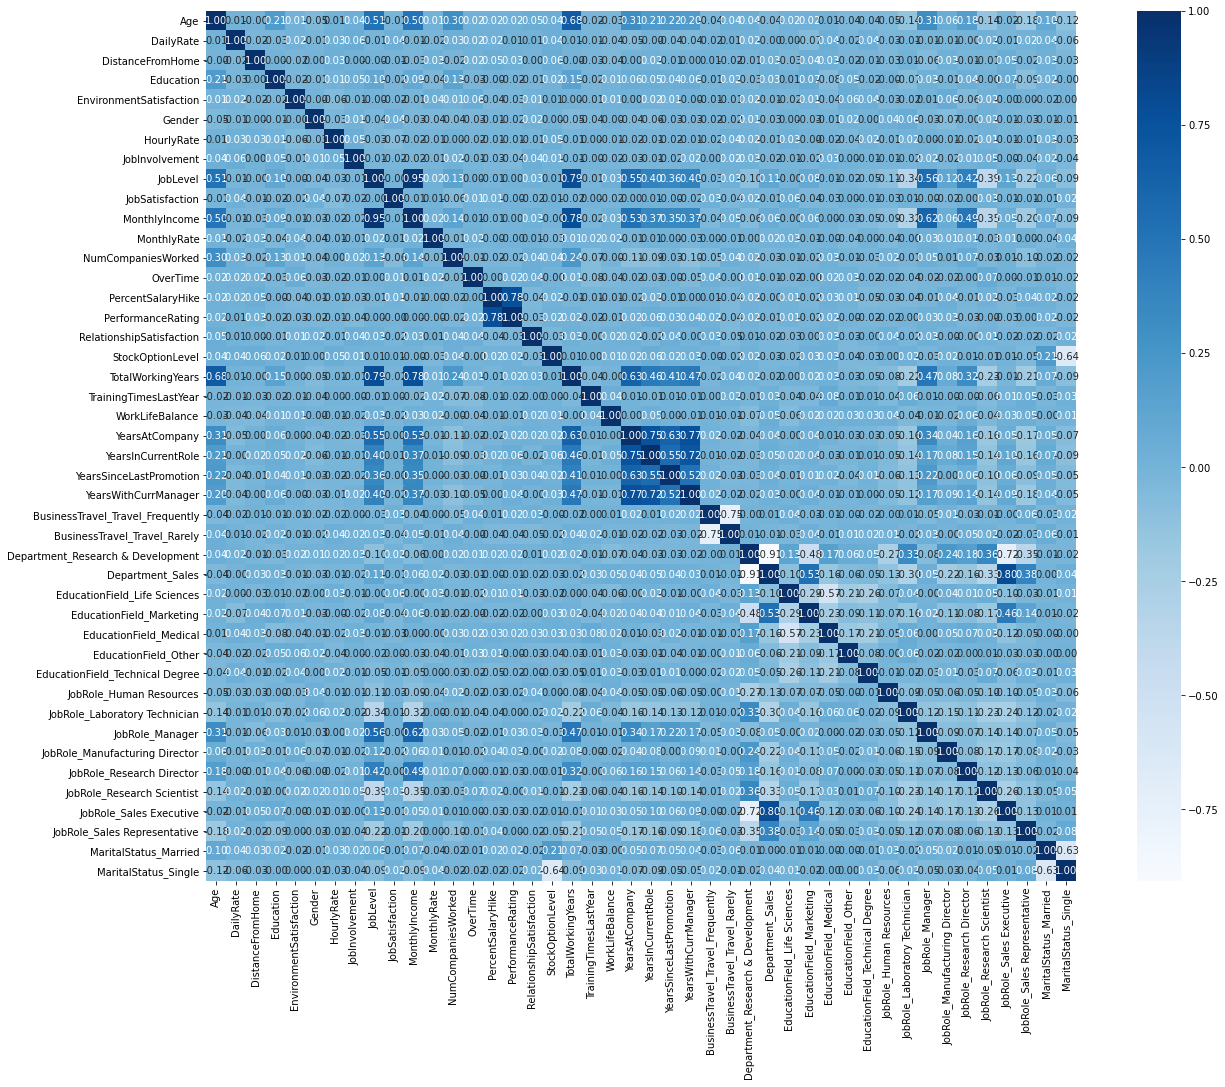

In [29]:
cormat = x_train.corr()
plt.figure(figsize=(22,16))
sns.heatmap(cormat, xticklabels=cormat.columns, yticklabels=cormat.columns, square=True, annot=True, fmt='0.2f', cmap='Blues')
# sns.heatmap(cormat, xticklabels=cormat.columns, yticklabels=cormat.columns, square=True, cmap='Blues')

In [68]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]) > threshold:
                col_corr.add(corr_matrix.columns[i])
    return col_corr

In [69]:
corr_feature = correlation(x_train, 0.75)
corr_feature

{'MonthlyIncome',
 'PerformanceRating',
 'TotalWorkingYears',
 'YearsInCurrentRole',
 'YearsWithCurrManager'}

In [70]:
x_train.drop(corr_feature, axis=1)
x_test.drop(corr_feature, axis=1)

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
2313   26       1384                 3          4                        1   
650    43        422                 1          3                        4   
2350   32        116                13          3                        3   
177    19        303                 2          3                        2   
2089   33        586                 1          3                        1   
...   ...        ...               ...        ...                      ...   
859    29        942                15          1                        2   
1407   24        771                 1          2                        2   
962    51        770                 5          3                        3   
2812   34       1480                 4          3                        3   
2274   48       1262                 1          4                        1   

      Gender  HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  \
2313       1          82               4         1                4   
650        0          33               3         2                4   
2350       0          77               2         1                2   
177        1          47               2         1                4   
2089       1          48               4         2                1   
...      ...         ...             ...       ...              ...   
859        0          69               1         1                4   
1407       1          45               2         2                3   
962        1          84               3         4                2   
2812       1          64               3         3                4   
2274       1          35               4         4                4   

      MonthlyRate  NumCompaniesWorked  OverTime  PercentSalaryHike  \
2313        13421                   1         0                 22   
650         21782                   4         0                 13   
2350         7331                   1         0                 20   
177          9241                   1         0                 22   
2089        21816                   1         0                 22   
...           ...                 ...       ...                ...   
859         26933                   0         1                 18   
1407        14120                   1         0                 12   
962         17588                   1         1                 11   
2812        24444                   2         1                 13   
2274        16154                   2         0                 22   

      RelationshipSatisfaction  StockOptionLevel  TrainingTimesLastYear  \
2313                         2                 1                      2   
650                          2                 1                      2   
2350                         3                 1                      2   
177                          3                 0                      3   
2089                         1                 1                      5   
...                        ...               ...                    ...   
859                          1                 1                      2   
1407                         2                 0                      2   
962                          2                 1                      2   
2812                         4                 3                      3   
2274                         3                 0                      3   

      WorkLifeBalance  YearsAtCompany  YearsSinceLastPromotion  
2313                3               8                        0  
650                 2               5                        2  
2350                3               2                        2  
177                 2               1                        1  
2089                3               9                        0  
...               ...             ...                      ...  
859                

## Auto-ML Using Lazy Predict Python Library

In [3]:
!pip install lazypredict

In [9]:
from lazypredict.Supervised import LazyRegressor

In [35]:
lreg = LazyRegressor()
models, predictions = lreg.fit(x_train, x_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 43/43 [00:15<00:00,  2.78it/s]


R-Squared  RMSE  Time Taken
Model                                                     
XGBRegressor                        0.80  0.16        0.50
ExtraTreesRegressor                 0.79  0.17        0.80
GaussianProcessRegressor            0.74  0.18        1.01
RandomForestRegressor               0.70  0.20        1.50
HistGradientBoostingRegressor       0.66  0.21        1.99
BaggingRegressor                    0.66  0.21        0.22
LGBMRegressor                       0.65  0.21        0.22
MLPRegressor                        0.60  0.22        4.34
ExtraTreeRegressor                  0.60  0.23        0.03
DecisionTreeRegressor               0.55  0.24        0.06
SVR                                 0.54  0.24        0.40
NuSVR                               0.52  0.25        1.23
GradientBoostingRegressor           0.37  0.28        0.64
BayesianRidge                       0.13  0.33        0.11
ElasticNetCV                        0.12  0.33        0.19
LassoLarsCV                         0.12  0.33        0.07
LassoCV                             0.12  0.33        0.18
LassoLarsIC                         0.12  0.33        0.05
RidgeCV                             0.12  0.33        0.04
Ridge                               0.12  0.33        0.02
LinearRegression                    0.12  0.33        0.02
TransformedTargetRegressor          0.12  0.33        0.03
Lars                                0.12  0.33        0.04
GeneralizedLinearRegressor          0.11  0.34        0.04
TweedieRegressor                    0.11  0.34        0.03
SGDRegressor                        0.10  0.34        0.02
LarsCV                              0.10  0.34        0.07
KNeighborsRegressor                 0.09  0.34        0.16
OrthogonalMatchingPursuitCV         0.09  0.34        0.03
AdaBoostRegressor                   0.06  0.35        0.09
PoissonRegressor                    0.05  0.35        0.05
OrthogonalMatchingPursuit           0.01  0.35        0.05
Lasso                              -0.00  0.36        0.03
ElasticNet                         -0.00  0.36        0.02
DummyRegressor                     -0.00  0.36        0.01
LassoLars                          -0.00  0.36        0.04
KernelRidge                        -0.06  0.37        0.53
HuberRegressor                     -0.18  0.39        0.29
LinearSVR                          -0.18  0.39        0.08
PassiveAggressiveRegressor         -0.47  0.43        0.04

## Random Forest Classifier

In [71]:
model_rf = RandomForestClassifier(random_state=42)

## Hyper-Parameter Optimization using GridSearchCV

In [53]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [6, 8, 10, 12, 14, 16, 18, 20],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(model_rf, cv = 10,
                     param_grid = param_dist, 
                     n_jobs = 3)

cv_rf.fit(x_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 16, 'max_features': 'log2'}
Time taken in grid search:  556.10


In [79]:
# Set best parameters given by grid search 
model_rf.set_params(bootstrap = True, 
                    criterion = 'gini', 
                    max_depth = 16, 
                    max_features = 'log2')

RandomForestClassifier(max_depth=16, max_features='log2', n_estimators=375,
                       random_state=42)

## Out of Bag Error Rate (OOB)

In [59]:
model_rf.set_params(warm_start=True, oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    model_rf.set_params(n_estimators=i)
    model_rf.fit(x_train, y_train)

    oob_error = 1 - model_rf.oob_score_
    error_rate[i] = oob_error
    
oob_series = pd.Series(error_rate)
# oob_series

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

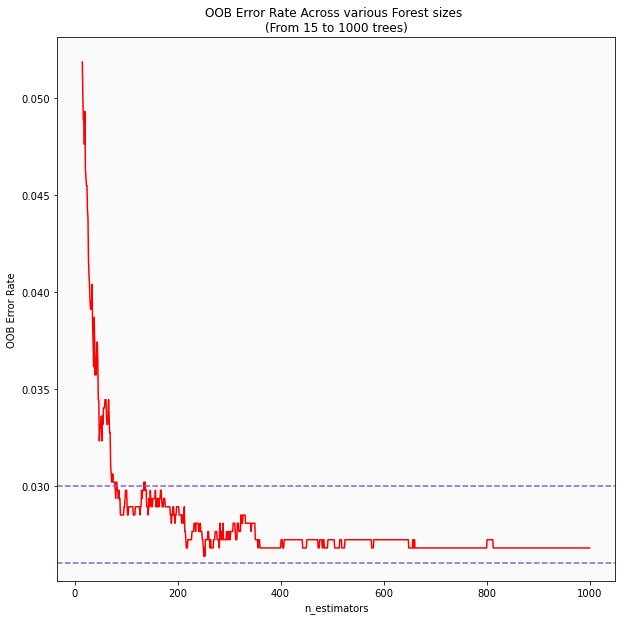

In [71]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.03, color='#875FDB',linestyle='--')
plt.axhline(0.026, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [67]:
print('OOB Error rate for 400 trees is: {0:.5f}'.format(oob_series[375]))

OOB Error rate for 400 trees is: 0.02679


In [72]:
# Refine the tree via OOB Output
model_rf.set_params(n_estimators=375,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(n_estimators=375, random_state=42)

## Train the RandomForest Model

In [73]:
model_rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=375, random_state=42)

## Variable Importance

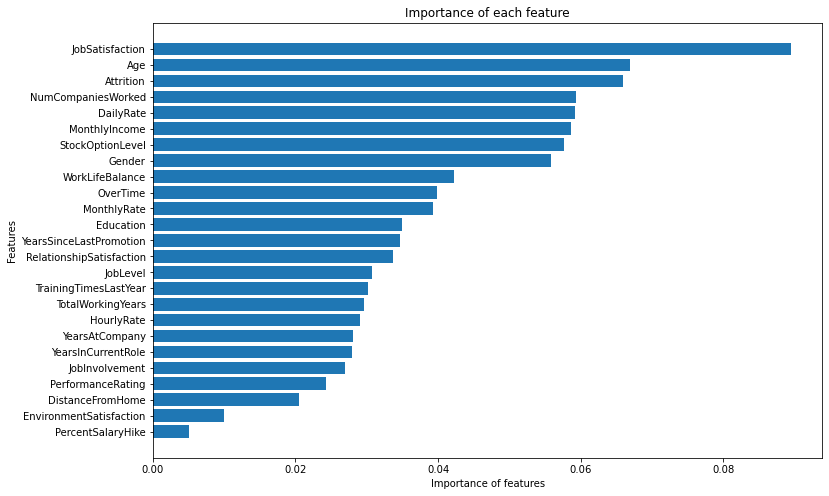

In [74]:
importances = model_rf.feature_importances_
names = df.columns
importances, names = zip(*sorted(zip(importances, names)))

plt.figure(figsize=(12,8))
plt.barh(range(len(names)), importances, align = 'center')
plt.yticks(range(len(names)), names)
plt.xlabel('Importance of features')
plt.ylabel('Features')
plt.title('Importance of each feature')
plt.show()

# Performance Matrices

In [75]:
print('Training Score: ', model_rf.score(x_train, y_train)*100, '%')
print('Testing Score: ', model_rf.score(x_test, y_test)*100, '%')

Training Score:  100.0 %
Testing Score:  96.93877551020408 %


## Accuracy

In [97]:
accuracy_rf = model_rf.score(x_test, y_test)
accuracy_rf

0.9693877551020408

## Error Rate

In [98]:
error_rate = 1 - accuracy_rf
error_rate

0.030612244897959218

## Confusion matrix

In [96]:
pred_rf = model_rf.predict(x_test)
# pred_rf

In [133]:
cm_array = confusion_matrix(y_test, pred_rf)
cm_array

array([[489,   0],
       [ 18,  81]], dtype=int64)

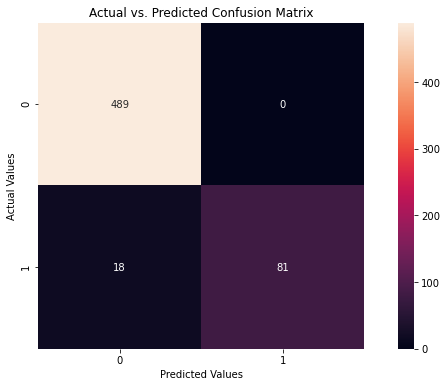

In [156]:
# plot confusion matrix
plt.figure(figsize=(12,6))
cm_df = pd.DataFrame(cm_array)
sns.heatmap(cm_df, square=True, annot=True, fmt='d')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

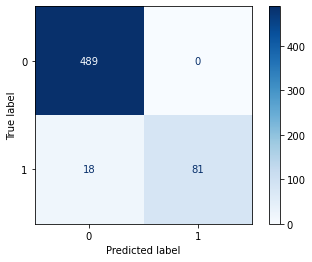

In [151]:
plot_confusion_matrix(model_rf, x_test, y_test, cmap=plt.cm.Blues)

## Area Under Curve (AUC)

In [163]:
prob_rf = model_rf.predict_proba(x_test)
prob_rf = prob_rf[:, 1]
# prob_rf

In [108]:
fpr, tpr, th = roc_curve(y_test, prob_rf)
roc_auc = auc(fpr, tpr)
roc_auc

0.996901530643862

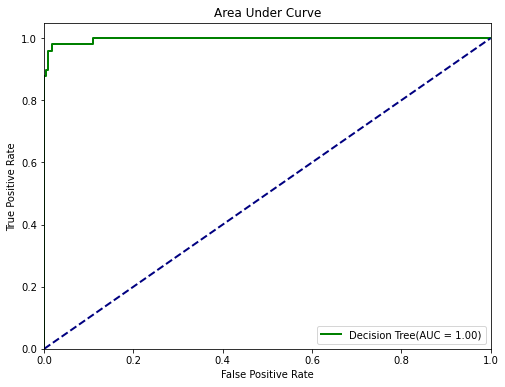

In [161]:
plt.figure(figsize=(8,6))
lw = 2
plt.plot(fpr, tpr, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

## Recall & Precision

In [113]:
recall_score(y_test, pred_rf)

0.8181818181818182

In [115]:
precision_score(y_test, pred_rf)

1.0

In [116]:
tp = sum((y_test == 1) & (pred_rf == 1))
fp = sum((y_test == 0) & (pred_rf == 1))
tn = sum((y_test == 0) & (pred_rf == 0))
fn = sum((y_test == 1) & (pred_rf == 0))

In [117]:
print('tp:', tp, 'fp:', fp, 'tn:', tn, 'fn:', fn)

tp: 81 fp: 0 tn: 489 fn: 18


In [118]:
print('Recall:', tp/(tp+fn))
print('Precision:', tp/(tp+fp))
print('Accuracy:', (tp+tn)/(tp+fp+tn+fn))

Recall: 0.8181818181818182
Precision: 1.0
Accuracy: 0.9693877551020408


## Classification Report

In [121]:
print(classification_report(pred_rf, y_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       507
           1       0.82      1.00      0.90        81

    accuracy                           0.97       588
   macro avg       0.91      0.98      0.94       588
weighted avg       0.97      0.97      0.97       588

